In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_excel("Sample Data 1.xlsx")

In [3]:
df.head()

Date of Procurement  Stock in Liters  Price (INR per Liter)  \
0          2024-01-05            10000                   70.0   
1          2024-02-10            12000                   72.0   
2          2024-03-15             8000                   68.0   
3          2024-04-20            15000                   75.0   
4          2024-05-25            18000                   78.0   

   Production Count  Sale Count  Supplier Discount (%)  \
0              9500        8000                    5.0   
1             11500        9000                    0.0   
2              7500        7000                    3.0   
3             14000       12000                    0.0   
4             16000       14000                    7.0   

   Forex Rate (INR to USD) Seasonality of Stock Material  
0                     82.5                        Winter  
1                     83.0                        Winter  
2                     82.8                        Spring  
3                     81.5                        Spring  
4                     80.0                        Summer

In [4]:
df.tail()

Date of Procurement  Stock in Liters  Price (INR per Liter)  \
1007          2023-11-02             9358                  78.45   
1008          2023-05-03            49419                  70.72   
1009          2023-12-01            13506                  82.65   
1010          2023-01-29            35214                  79.95   
1011          2023-09-06            16306                  97.31   

      Production Count  Sale Count  Supplier Discount (%)  \
1007             40476        9299                    3.0   
1008             34198        1025                    NaN   
1009             38993       10290                    NaN   
1010             36296       22844                    NaN   
1011             23372       23118                    NaN   

      Forex Rate (INR to USD) Seasonality of Stock Material  
1007                     84.0                        Winter  
1008                     83.0                        Autumn  
1009                     81.0                       Monsoon  
1010                     87.0                       Monsoon  
1011                     78.0                       Monsoon

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date of Procurement            1012 non-null   datetime64[ns]
 1   Stock in Liters                1012 non-null   int64         
 2   Price (INR per Liter)          1012 non-null   float64       
 3   Production Count               1012 non-null   int64         
 4   Sale Count                     1012 non-null   int64         
 5   Supplier Discount (%)          423 non-null    float64       
 6   Forex Rate (INR to USD)        1012 non-null   float64       
 7   Seasonality of Stock Material  1012 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 63.4+ KB


In [6]:
df.isnull().sum()

Date of Procurement                0
Stock in Liters                    0
Price (INR per Liter)              0
Production Count                   0
Sale Count                         0
Supplier Discount (%)            589
Forex Rate (INR to USD)            0
Seasonality of Stock Material      0
dtype: int64

In [7]:
# Before Imputation
correlation_matrix_1 = df[['Sale Count', 'Stock in Liters', 'Price (INR per Liter)', 'Production Count', 'Supplier Discount (%)', 'Forex Rate (INR to USD)']].corr()
correlation_matrix_1

Sale Count  Stock in Liters  Price (INR per Liter)  \
Sale Count                 1.000000         0.094794               0.051983   
Stock in Liters            0.094794         1.000000              -0.008742   
Price (INR per Liter)      0.051983        -0.008742               1.000000   
Production Count          -0.008971         0.023821               0.032754   
Supplier Discount (%)      0.062005         0.104269              -0.056817   
Forex Rate (INR to USD)    0.039863         0.012771               0.004115   

                         Production Count  Supplier Discount (%)  \
Sale Count                      -0.008971               0.062005   
Stock in Liters                  0.023821               0.104269   
Price (INR per Liter)            0.032754              -0.056817   
Production Count                 1.000000               0.038512   
Supplier Discount (%)            0.038512               1.000000   
Forex Rate (INR to USD)          0.025609               0.021620   

                         Forex Rate (INR to USD)  
Sale Count                              0.039863  
Stock in Liters                         0.012771  
Price (INR per Liter)                   0.004115  
Production Count                        0.025609  
Supplier Discount (%)                   0.021620  
Forex Rate (INR to USD)                 1.000000

In [8]:
# Select features relevant for imputation, including 'Supplier Discount (%)'
features = ['Supplier Discount (%)', 'Sale Count']

# Create a subset of the data containing only these features
data_subset = df[features]

# Initialize the KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Fit the imputer on the data and transform it
imputed_data = imputer.fit_transform(data_subset)

# Assign the imputed data back to the DataFrame
df[features] = pd.DataFrame(imputed_data, columns=features)


In [9]:
df.describe()

Date of Procurement  Stock in Liters  Price (INR per Liter)  \
count                           1012      1012.000000            1012.000000   
mean   2023-10-23 20:16:36.047430912     27501.273715              84.926917   
min              2023-01-01 00:00:00      5021.000000              68.000000   
25%              2023-05-25 18:00:00     15412.750000              77.482500   
50%              2023-10-25 00:00:00     27515.500000              84.720000   
75%              2024-03-19 00:00:00     38806.000000              92.580000   
max              2024-12-30 00:00:00     49906.000000              99.850000   
std                              NaN     13224.647745               8.636586   

       Production Count    Sale Count  Supplier Discount (%)  \
count       1012.000000   1012.000000            1012.000000   
mean       22199.819170  19710.294466               9.799012   
min           31.000000     12.000000               0.000000   
25%        10355.000000   9225.500000               6.800000   
50%        21783.000000  19504.500000               9.800000   
75%        33730.000000  30127.750000              12.800000   
max        44947.000000  39994.000000              20.000000   
std        13233.233456  11675.151752               4.653488   

       Forex Rate (INR to USD)  
count              1012.000000  
mean                 81.483399  
min                  75.000000  
25%                  78.000000  
50%                  81.850000  
75%                  85.000000  
max                  88.000000  
std                   3.918172

In [10]:
df

Date of Procurement  Stock in Liters  Price (INR per Liter)  \
0             2024-01-05            10000                  70.00   
1             2024-02-10            12000                  72.00   
2             2024-03-15             8000                  68.00   
3             2024-04-20            15000                  75.00   
4             2024-05-25            18000                  78.00   
...                  ...              ...                    ...   
1007          2023-11-02             9358                  78.45   
1008          2023-05-03            49419                  70.72   
1009          2023-12-01            13506                  82.65   
1010          2023-01-29            35214                  79.95   
1011          2023-09-06            16306                  97.31   

      Production Count  Sale Count  Supplier Discount (%)  \
0                 9500      8000.0                    5.0   
1                11500      9000.0                    0.0   
2                 7500      7000.0                    3.0   
3                14000     12000.0                    0.0   
4                16000     14000.0                    7.0   
...                ...         ...                    ...   
1007             40476      9299.0                    3.0   
1008             34198      1025.0                    7.8   
1009             38993     10290.0                    9.4   
1010             36296     22844.0                    8.6   
1011             23372     23118.0                    8.8   

      Forex Rate (INR to USD) Seasonality of Stock Material  
0                        82.5                        Winter  
1                        83.0                        Winter  
2                        82.8                        Spring  
3                        81.5                        Spring  
4                        80.0                        Summer  
...                       ...                           ...  
1007                     84.0                        Winter  
1008                     83.0                        Autumn  
1009                     81.0                       Monsoon  
1010                     87.0                       Monsoon  
1011                     78.0                       Monsoon  

[1012 rows x 8 columns]

In [11]:
# After imputation using KNN
correlation_matrix = df[['Sale Count', 'Stock in Liters', 'Price (INR per Liter)', 'Production Count', 'Supplier Discount (%)', 'Forex Rate (INR to USD)']].corr()
correlation_matrix

Sale Count  Stock in Liters  Price (INR per Liter)  \
Sale Count                 1.000000         0.094794               0.051983   
Stock in Liters            0.094794         1.000000              -0.008742   
Price (INR per Liter)      0.051983        -0.008742               1.000000   
Production Count          -0.008971         0.023821               0.032754   
Supplier Discount (%)      0.080476         0.067804              -0.034280   
Forex Rate (INR to USD)    0.039863         0.012771               0.004115   

                         Production Count  Supplier Discount (%)  \
Sale Count                      -0.008971               0.080476   
Stock in Liters                  0.023821               0.067804   
Price (INR per Liter)            0.032754              -0.034280   
Production Count                 1.000000               0.034583   
Supplier Discount (%)            0.034583               1.000000   
Forex Rate (INR to USD)          0.025609               0.040666   

                         Forex Rate (INR to USD)  
Sale Count                              0.039863  
Stock in Liters                         0.012771  
Price (INR per Liter)                   0.004115  
Production Count                        0.025609  
Supplier Discount (%)                   0.040666  
Forex Rate (INR to USD)                 1.000000

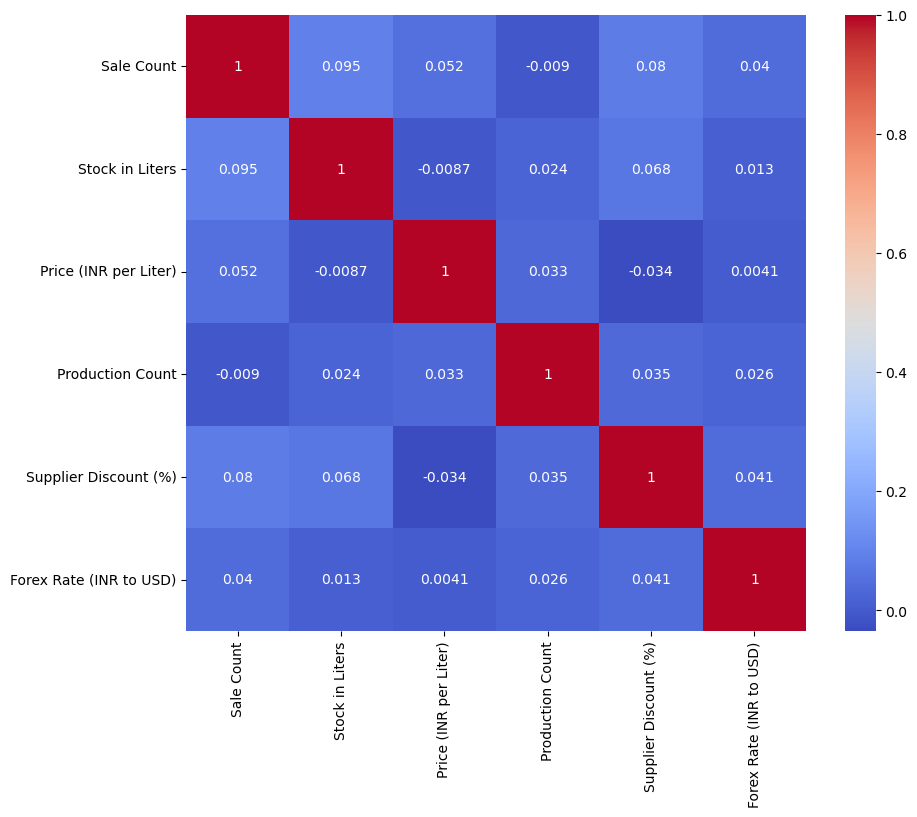

In [12]:
fig = plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

C:\Users\Rahul\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


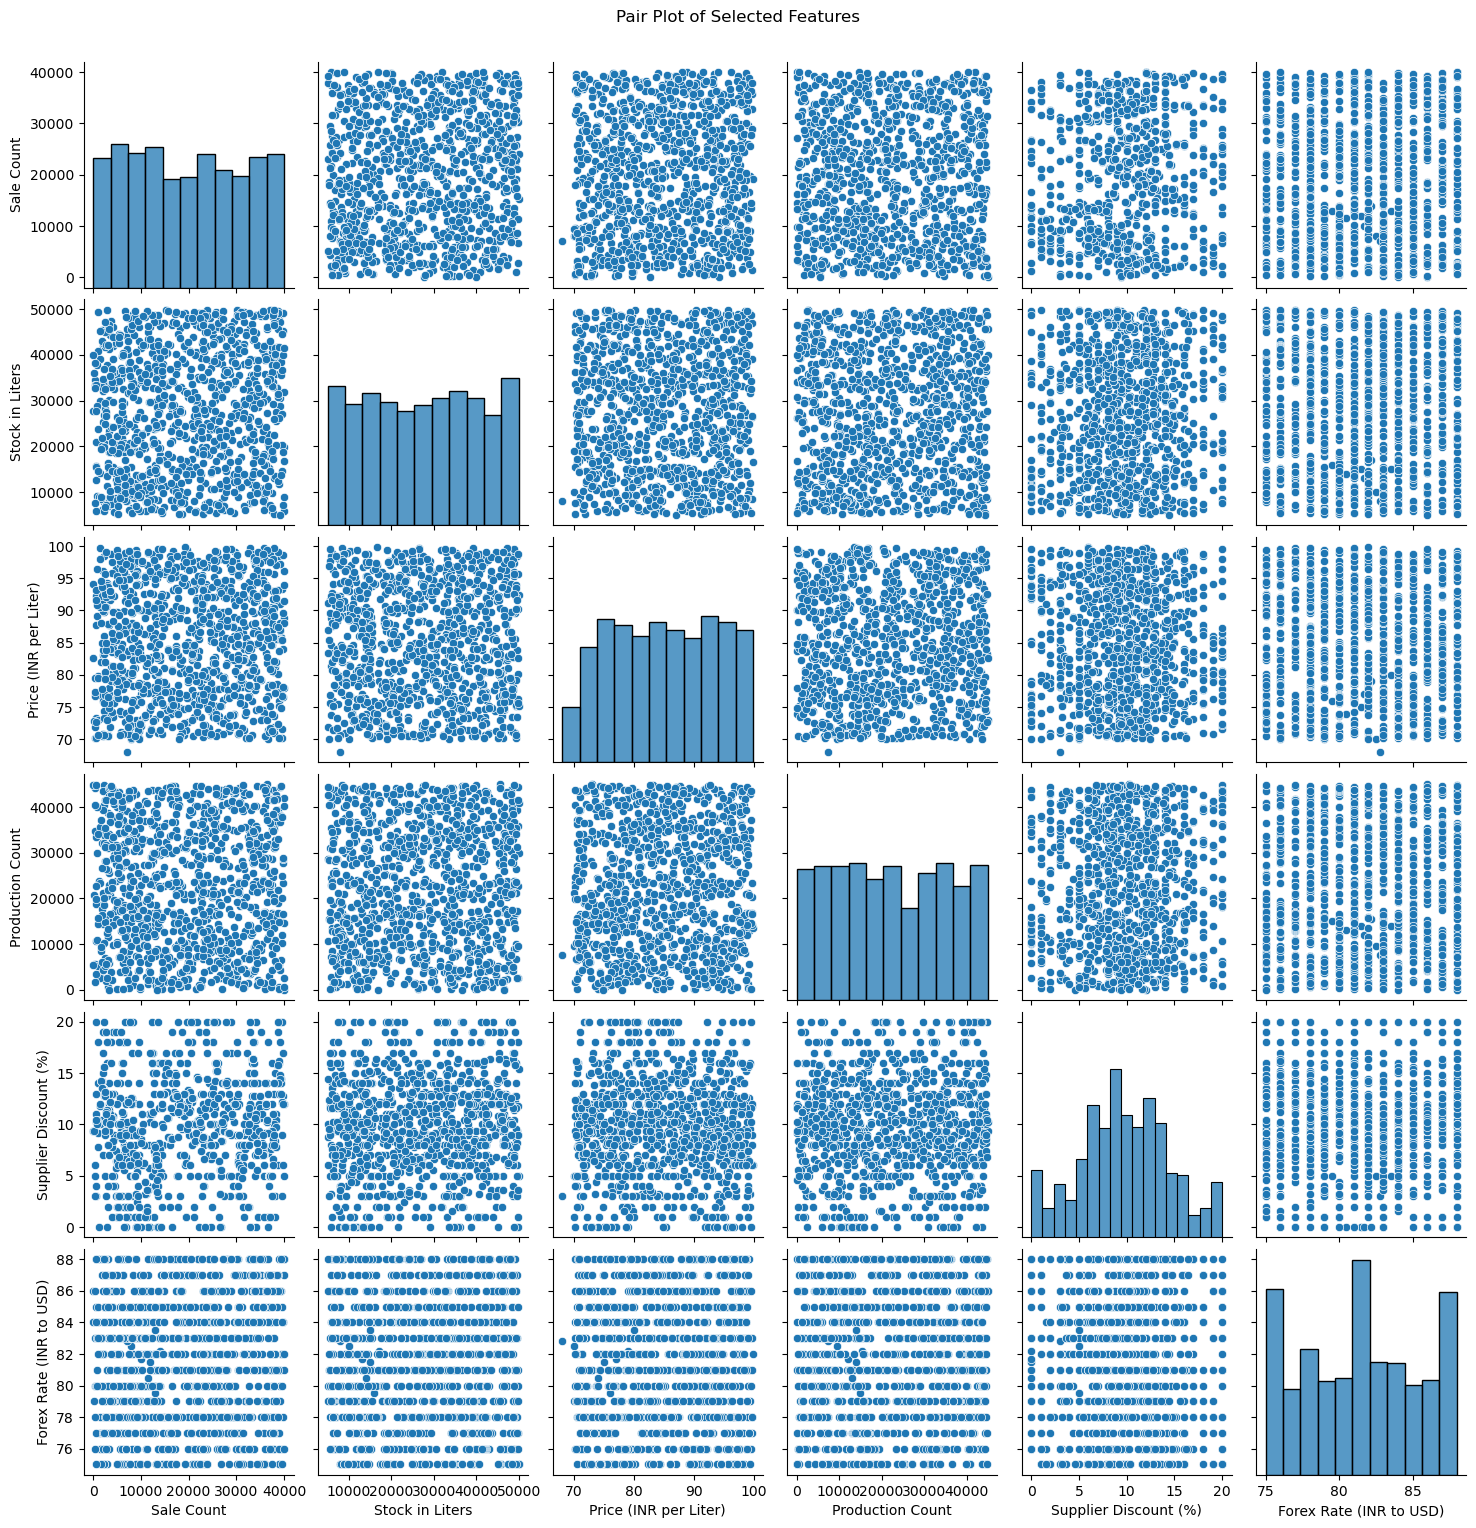

In [13]:
sns.pairplot(df[['Sale Count', 'Stock in Liters', 'Price (INR per Liter)', 'Production Count', 'Supplier Discount (%)', 'Forex Rate (INR to USD)']])
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()


C:\Users\Rahul\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


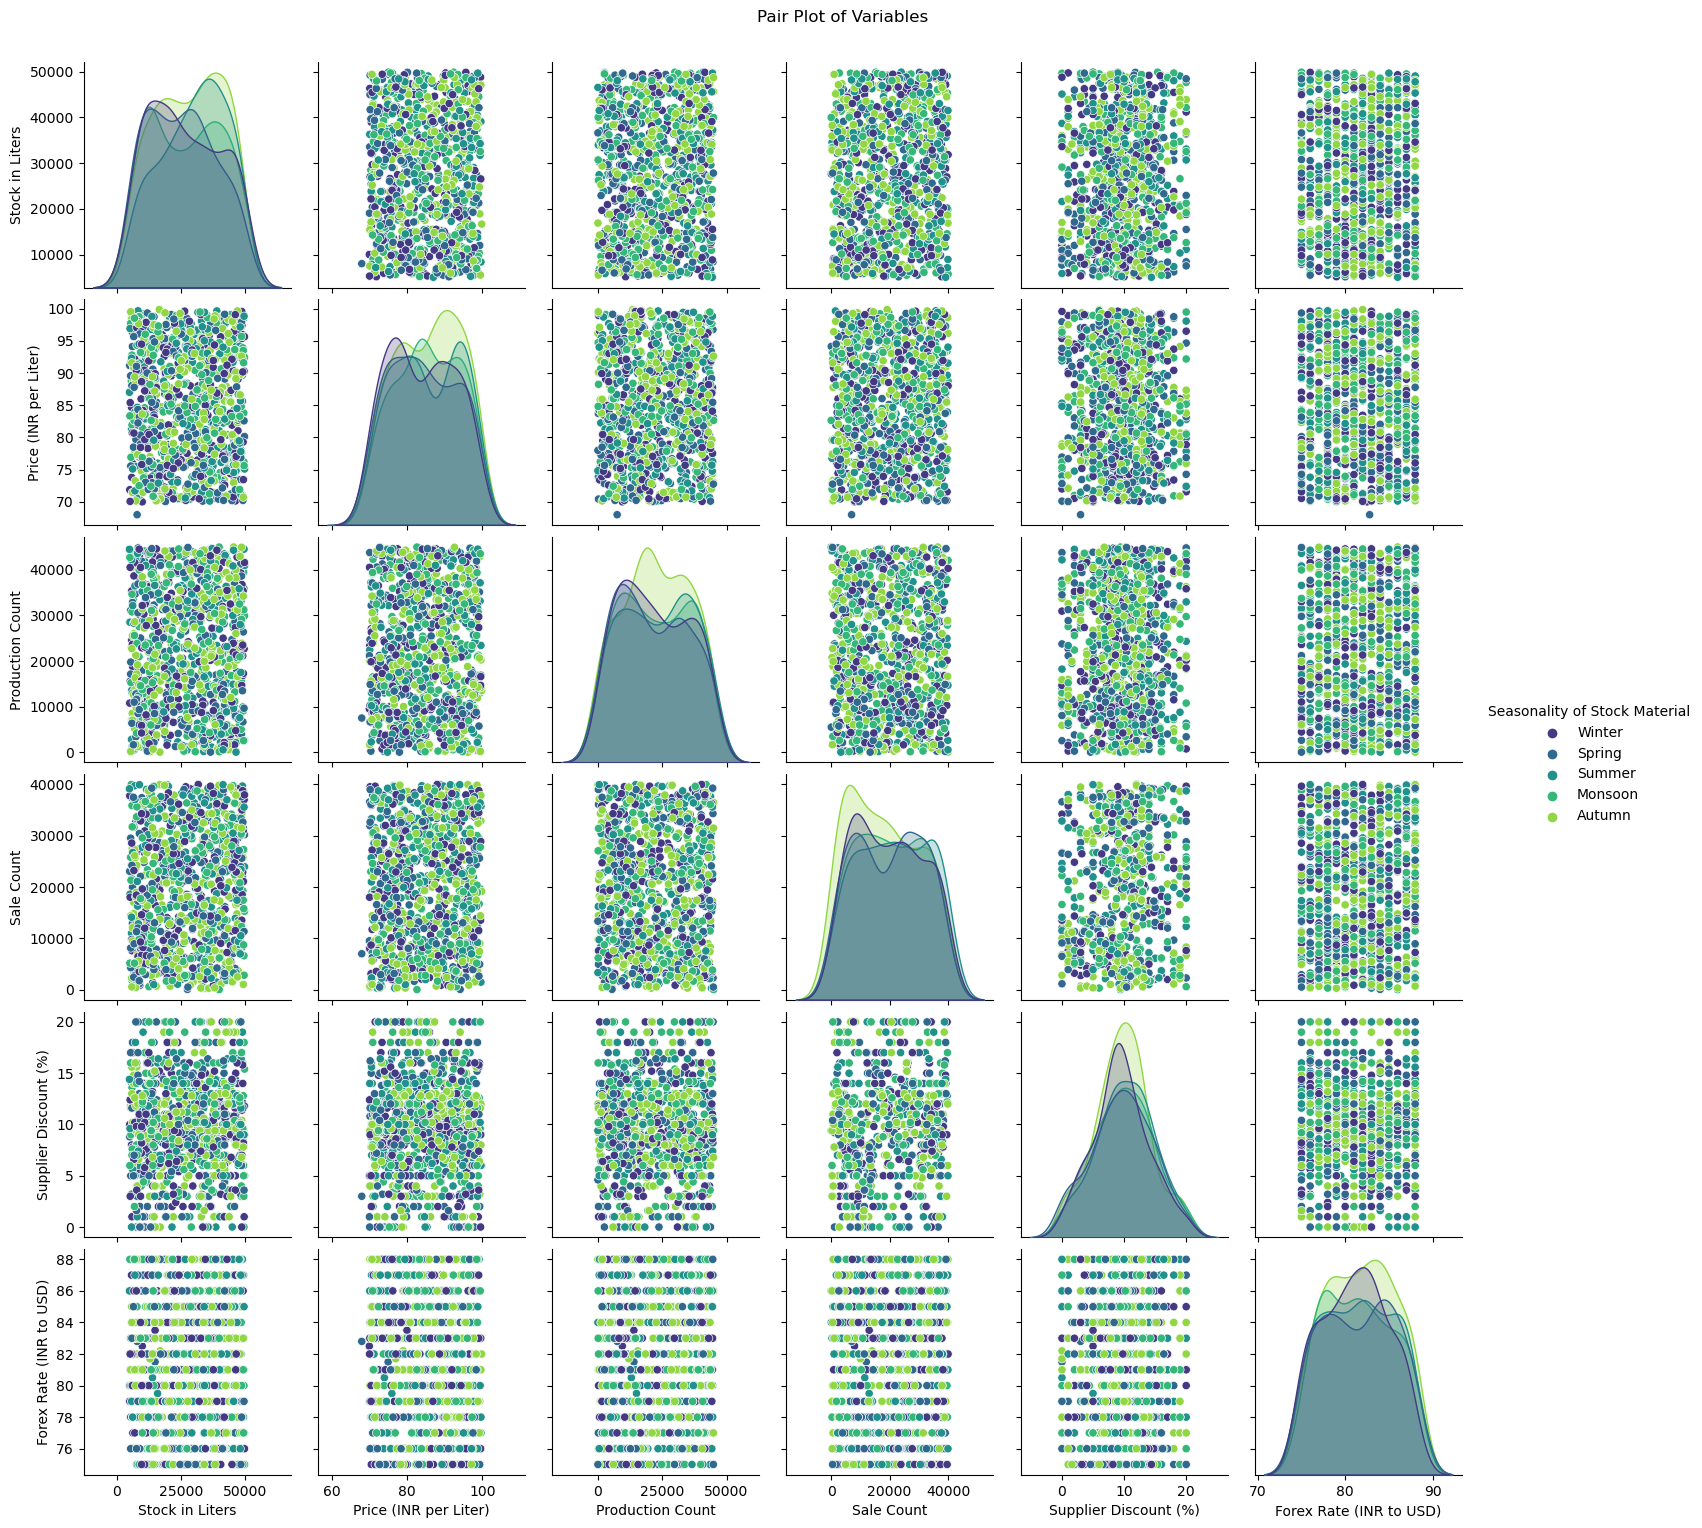

In [14]:
sns.pairplot(df, diag_kind='kde', hue='Seasonality of Stock Material', palette='viridis')
plt.suptitle('Pair Plot of Variables', y=1.02)
plt.show()

In [15]:
import plotly.express as px

fig = px.scatter(df, x='Stock in Liters', y='Sale Count', color='Price (INR per Liter)', title='Sale Vs Stock in Liters')
fig.show()

In [16]:
# Converting Seasonality of Stock Materials to Dummies
df_1 = pd.get_dummies(df,columns=['Seasonality of Stock Material'],drop_first=True)
df_1

Date of Procurement  Stock in Liters  Price (INR per Liter)  \
0             2024-01-05            10000                  70.00   
1             2024-02-10            12000                  72.00   
2             2024-03-15             8000                  68.00   
3             2024-04-20            15000                  75.00   
4             2024-05-25            18000                  78.00   
...                  ...              ...                    ...   
1007          2023-11-02             9358                  78.45   
1008          2023-05-03            49419                  70.72   
1009          2023-12-01            13506                  82.65   
1010          2023-01-29            35214                  79.95   
1011          2023-09-06            16306                  97.31   

      Production Count  Sale Count  Supplier Discount (%)  \
0                 9500      8000.0                    5.0   
1                11500      9000.0                    0.0   
2                 7500      7000.0                    3.0   
3                14000     12000.0                    0.0   
4                16000     14000.0                    7.0   
...                ...         ...                    ...   
1007             40476      9299.0                    3.0   
1008             34198      1025.0                    7.8   
1009             38993     10290.0                    9.4   
1010             36296     22844.0                    8.6   
1011             23372     23118.0                    8.8   

      Forex Rate (INR to USD)  Seasonality of Stock Material_Monsoon  \
0                        82.5                                  False   
1                        83.0                                  False   
2                        82.8                                  False   
3                        81.5                                  False   
4                        80.0                                  False   
...                       ...                                    ...   
1007                     84.0                                  False   
1008                     83.0                                  False   
1009                     81.0                                   True   
1010                     87.0                                   True   
1011                     78.0                                   True   

      Seasonality of Stock Material_Spring  \
0                                    False   
1                                    False   
2                                     True   
3                                     True   
4                                    False   
...                                    ...   
1007                                 False   
1008                                 False   
1009                                 False   
1010                                 False   
1011                                 False   

      Seasonality of Stock Material_Summer  \
0                                    False   
1                                    False   
2                                    False   
3                                    False   
4                                     True   
...                                    ...   
1007                                 False   
1008                                 False   
1009                                 False   
1010                                 False   
1011                                 False   

      Seasonality of Stock Material_Winter  
0                                     True  
1                                     True  
2                                    False  
3                                    False  
4                                    False  
...                                    ...  
1007                                  True  
1008                                 False  
1009                                 False  
1010                              

In [17]:
df_1 = df_1.replace({True: 1, False:0})
df_1

Date of Procurement  Stock in Liters  Price (INR per Liter)  \
0             2024-01-05            10000                  70.00   
1             2024-02-10            12000                  72.00   
2             2024-03-15             8000                  68.00   
3             2024-04-20            15000                  75.00   
4             2024-05-25            18000                  78.00   
...                  ...              ...                    ...   
1007          2023-11-02             9358                  78.45   
1008          2023-05-03            49419                  70.72   
1009          2023-12-01            13506                  82.65   
1010          2023-01-29            35214                  79.95   
1011          2023-09-06            16306                  97.31   

      Production Count  Sale Count  Supplier Discount (%)  \
0                 9500      8000.0                    5.0   
1                11500      9000.0                    0.0   
2                 7500      7000.0                    3.0   
3                14000     12000.0                    0.0   
4                16000     14000.0                    7.0   
...                ...         ...                    ...   
1007             40476      9299.0                    3.0   
1008             34198      1025.0                    7.8   
1009             38993     10290.0                    9.4   
1010             36296     22844.0                    8.6   
1011             23372     23118.0                    8.8   

      Forex Rate (INR to USD)  Seasonality of Stock Material_Monsoon  \
0                        82.5                                      0   
1                        83.0                                      0   
2                        82.8                                      0   
3                        81.5                                      0   
4                        80.0                                      0   
...                       ...                                    ...   
1007                     84.0                                      0   
1008                     83.0                                      0   
1009                     81.0                                      1   
1010                     87.0                                      1   
1011                     78.0                                      1   

      Seasonality of Stock Material_Spring  \
0                                        0   
1                                        0   
2                                        1   
3                                        1   
4                                        0   
...                                    ...   
1007                                     0   
1008                                     0   
1009                                     0   
1010                                     0   
1011                                     0   

      Seasonality of Stock Material_Summer  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        1   
...                                    ...   
1007                                     0   
1008                                     0   
1009                                     0   
1010                                     0   
1011                                     0   

      Seasonality of Stock Material_Winter  
0                                        1  
1                                        1  
2                                        0  
3                                        0  
4                                        0  
...                                    ...  
1007                                     1  
1008                                     0  
1009                                     0  
1010                              

In [18]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Date of Procurement                    1012 non-null   datetime64[ns]
 1   Stock in Liters                        1012 non-null   int64         
 2   Price (INR per Liter)                  1012 non-null   float64       
 3   Production Count                       1012 non-null   int64         
 4   Sale Count                             1012 non-null   float64       
 5   Supplier Discount (%)                  1012 non-null   float64       
 6   Forex Rate (INR to USD)                1012 non-null   float64       
 7   Seasonality of Stock Material_Monsoon  1012 non-null   int64         
 8   Seasonality of Stock Material_Spring   1012 non-null   int64         
 9   Seasonality of Stock Material_Summer   1012 non-null   int64   

In [19]:
# Defending X depandend and Y independent

X = df_1.drop(columns=['Date of Procurement', 'Sale Count'])
Y = df_1['Sale Count']


In [20]:
# X = df_1.drop(columns=['Date of Procurement', 'Price (INR per Liter)','Production Count','Sale Count'])
# Y = df_1['Price (INR per Liter)']

In [21]:
'''
# Defending X depandend and Y independent
X = df_1.drop(columns=['Date of Procurement', 'Production Count'])
Y = df_1['Production Count']
'''

"\n# Defending X depandend and Y independent\nX = df_1.drop(columns=['Date of Procurement', 'Production Count'])\nY = df_1['Production Count']\n"

In [22]:
# Add a constant term to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Print the summary to get p-values and coefficients
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale Count   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     3.081
Date:                Mon, 12 Aug 2024   Prob (F-statistic):            0.00118
Time:                        09:13:55   Log-Likelihood:                -10899.
No. Observations:                1012   AIC:                         2.182e+04
Df Residuals:                    1002   BIC:                         2.187e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [23]:
# Train and Test

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.15)

In [24]:
# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, Y_train)


LinearRegression()

In [25]:
y_pred = model.predict(X_test)


In [26]:
# Evaluate the model
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 141032049.4862139
R^2 Score: -0.05365921205668811


In [27]:
# Root Mean Square Error
rmse = np.sqrt(mse).round(2)
rmse

11875.69

In [28]:
import plotly.express as px

# Assuming Y_test and y_pred are your actual and predicted Sale Count values
fig = px.scatter(x=Y_test, y=y_pred, 
                 labels={'x': 'Actual Sale Count', 'y': 'Predicted Sale Count'}, 
                 title='Actual vs. Predicted Sale Count')

# Add a reference line (similar to the Matplotlib 'r--' line)
fig.add_shape(type='line',
              x0=Y_test.min(), y0=Y_test.min(),
              x1=Y_test.max(), y1=Y_test.max(),
              line=dict(color='Red', dash='dash'))

# Show the plot
fig.show()


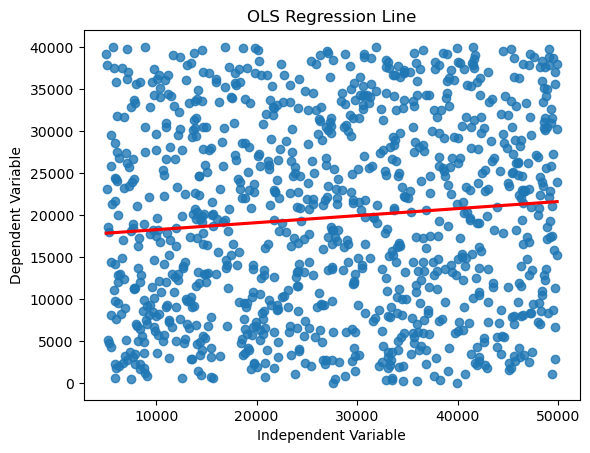

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming 'X' is your independent variable and 'y' is your dependent variable
X = sm.add_constant(X)  # Add constant to the model (intercept)
model = sm.OLS(Y, X).fit()

# Visualization using Seaborn
sns.regplot(x=X.iloc[:, 1], y=Y, line_kws={"color": "red"}, ci=None)
plt.xlabel("Independent Variable")
plt.ylabel("Dependent Variable")
plt.title("OLS Regression Line")
plt.show()
